# Using pandas to import historical market data

In [1]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data, wb
import datetime, math

In [33]:
start = datetime.datetime(1900, 1, 1)
end   = datetime.datetime(2017, 1, 1)

In [41]:
df = data.DataReader("SPY", 'yahoo', start, end)
df['adjClose'] = df['Adj Close']
df.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [42]:
df.axes

[DatetimeIndex(['1993-01-29', '1993-02-01', '1993-02-02', '1993-02-03',
                '1993-02-04', '1993-02-05', '1993-02-08', '1993-02-09',
                '1993-02-10', '1993-02-11',
                ...
                '2016-07-11', '2016-07-12', '2016-07-13', '2016-07-14',
                '2016-07-15', '2016-07-18', '2016-07-19', '2016-07-20',
                '2016-07-21', '2016-07-22'],
               dtype='datetime64[ns]', name=u'Date', length=5914, freq=None),
 Index([u'adjClose'], dtype='object')]

In [43]:
df['prevClose'] = df['adjClose'].shift(1)

In [44]:
df['mean'] = df['adjClose'].rolling(window=10).mean()

In [45]:
def trade(row):
    if   (row['adjClose'] - row['mean']) / row['prevClose'] > +0.01:
        return -1
    elif (row['adjClose'] - row['mean']) / row['prevClose'] < -0.01:
        return +1
    else:
        return 0
df['trade'] = df.apply(lambda x: trade(x), axis=1).shift(1)
df['pnl'] = df.apply(lambda x: x['trade']*(x['adjClose'] - x['prevClose']) / x['prevClose'] + 1, axis=1)
df['cumpnl'] = np.cumprod(df['pnl'])
df

,adjClose,prevClose,mean,trade,pnl,cumpnl
Date,,,,,,
1993-01-29,28.308155,NaN,NaN,NaN,NaN,NaN
1993-02-01,28.509494,28.308155,NaN,0.0,1.000000,1.000000
1993-02-02,28.569863,28.509494,NaN,0.0,1.000000,1.000000
1993-02-03,28.871902,28.569863,NaN,0.0,1.000000,1.000000
1993-02-04,28.992705,28.871902,NaN,0.0,1.000000,1.000000
1993-02-05,28.972540,28.992705,NaN,0.0,1.000000,1.000000
1993-02-08,28.972540,28.972540,NaN,0.0,1.000000,1.000000
1993-02-09,28.771201,28.972540,NaN,0.0,1.000000,1.000000
1993-02-10,28.811469,28.771201,NaN,0.0,1.000000,1.000000


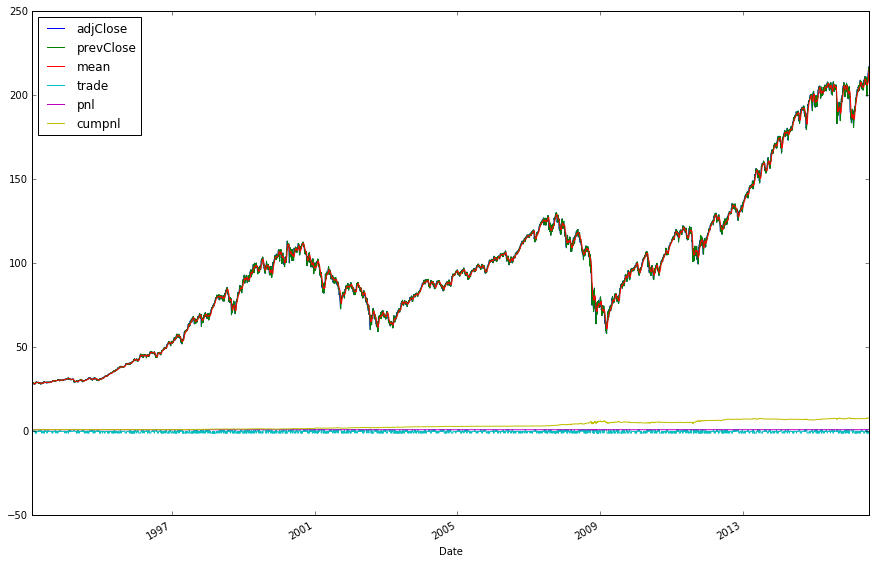

In [46]:
df.plot()

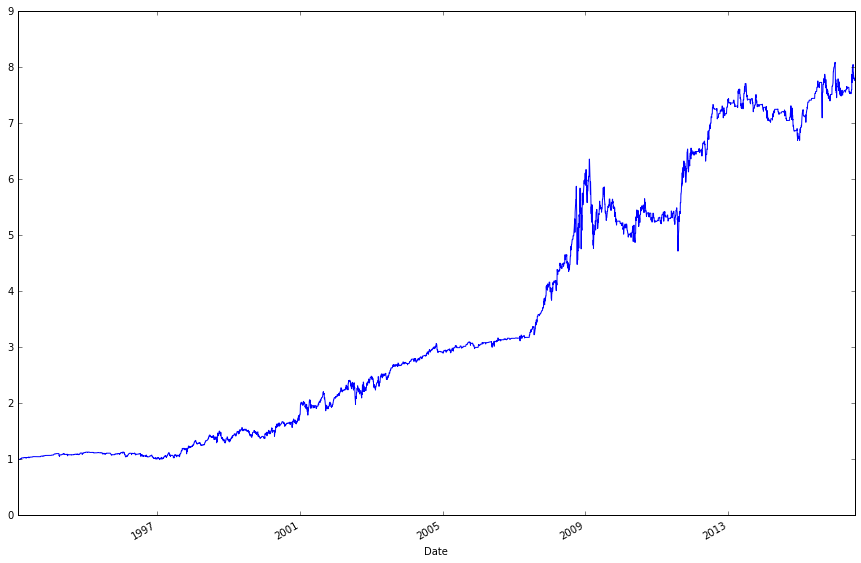

In [47]:
df['cumpnl'].plot()